<a name="back_to_content."></a>
# Определение перспективного тарифа для телеком компании

В данном проекте исследуется два тарифа оператора сотовой связи «Мегалайн»: «Смарт» и «Ультра». Основная задача проекта выяснить, какой из тарифов приносит больше денег.
Для этого нам передали данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

### Оглавление
1. [Загрузка данных](#start)
2. [Подготовка данных](#preprocessing)
	* [Подготовка сводной таблицы](#pivod_table)
3. [Анализ данных](#data_analysis)
4. [Проверка гипотез](#hypothesis_testing)
5. [Общий вывод](#conclusion)


### Описание тарифов

Тариф `«Смарт»`

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф `«Ультра»`

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

### Описание данных

Таблица `users` (информация о пользователях):

- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

Таблица `calls` (информация о звонках):

- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):

- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):

- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):

- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a id="start"></a>
## Загрузка данных
<font size="2">([к содержанию](#back_to_content.))</font> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

sns.set(font_scale=1.4, style="whitegrid")

In [2]:
df_calls = pd.read_csv('datasets/calls.csv')
df_internet = pd.read_csv('datasets/internet.csv')
df_messages = pd.read_csv('datasets/messages.csv')
df_tariffs = pd.read_csv('datasets/tariffs.csv')
df_users = pd.read_csv('datasets/users.csv')
    
tableD = {
    'calls': df_calls, 
    'internet': df_internet, 
    'messages': df_messages, 
    'tariffs': df_tariffs, 
    'users': df_users
}

for tName in tableD:
    table = tableD[tName]    
    print(f'\n\n▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄\t\t{tName}\t\t▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄\n\n')
        
    print('  • Column name')
    display(list(table))    
    print('\n\n  • DF Info')
    table.info()
    print('\n\n  • NA info')
    naInfo = table.isnull().sum().to_frame()
    naInfo.columns = ['count na']
    naInfo['percent na'] = table.isnull().sum() / table.shape[0] *100
    display(naInfo)
        
    print('  • Sample')
    display(table.sample(5, replace=True))
    
    print('  • Describe')
    display(table.describe())



▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄		calls		▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄


  • Column name


['id', 'call_date', 'duration', 'user_id']



  • DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


  • NA info


,count na,percent na
id,0,0.0
call_date,0,0.0
duration,0,0.0
user_id,0,0.0


  • Sample


,id,call_date,duration,user_id
138388,1353_167,2018-05-12,18.65,1353
18967,1052_116,2018-08-23,6.66,1052
150255,1377_1102,2018-05-10,20.94,1377
22948,1059_32,2018-11-12,6.44,1059
39175,1098_3,2018-07-14,2.32,1098


  • Describe


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000




▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄		internet		▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄


  • Column name


['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id']



  • DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


  • NA info


,count na,percent na
Unnamed: 0,0,0.0
id,0,0.0
mb_used,0,0.0
session_date,0,0.0
user_id,0,0.0


  • Sample


,Unnamed: 0,id,mb_used,session_date,user_id
33059,33059,1116_100,698.92,2018-11-22,1116
126742,126742,1425_271,495.56,2018-04-16,1425
25578,25578,1088_213,356.81,2018-12-10,1088
41166,41166,1144_326,303.73,2018-05-22,1144
78686,78686,1264_305,149.31,2018-08-06,1264


  • Describe


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000




▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄		messages		▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄


  • Column name


['id', 'message_date', 'user_id']



  • DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


  • NA info


,count na,percent na
id,0,0.0
message_date,0,0.0
user_id,0,0.0


  • Sample


,id,message_date,user_id
75017,1318_46,2018-05-06,1318
106510,1431_252,2018-05-29,1431
45047,1196_497,2018-06-02,1196
114653,1468_41,2018-08-03,1468
22793,1096_73,2018-08-01,1096


  • Describe


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000




▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄		tariffs		▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄


  • Column name


['messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute',
 'tariff_name']



  • DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


  • NA info


,count na,percent na
messages_included,0,0.0
mb_per_month_included,0,0.0
minutes_included,0,0.0
rub_monthly_fee,0,0.0
rub_per_gb,0,0.0
rub_per_message,0,0.0
rub_per_minute,0,0.0
tariff_name,0,0.0


  • Sample


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra
1,1000,30720,3000,1950,150,1,1,ultra
1,1000,30720,3000,1950,150,1,1,ultra


  • Describe


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000




▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄		users		▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄


  • Column name


['user_id',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff']



  • DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


  • NA info


,count na,percent na
user_id,0,0.0
age,0,0.0
churn_date,462,92.4
city,0,0.0
first_name,0,0.0
last_name,0,0.0
reg_date,0,0.0
tariff,0,0.0


  • Sample


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
236,1236,30,NaN,Москва,Леон,Демидов,2018-12-22,smart
167,1167,30,NaN,Кемерово,Клавдия,Абдулина,2018-09-29,ultra
276,1276,30,NaN,Москва,Михаил,Крюков,2018-10-05,ultra
322,1322,45,NaN,Балашиха,Александр,Сальников,2018-09-09,smart
425,1425,51,NaN,Пермь,Вадим,Фомин,2018-02-27,smart


  • Describe


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод

По первичной оценке выявлены следующие проблемы:
- Нулевое время звонка, таблица calls, колонка duration
- Нулевой объем трафика за сессию, таблица internet, колонка mb_used
- Колонка с номерами строк (без названия), таблица internet
- Колонки с датами (*_date), во всех таблицах, в строковом формате
- Объем трафика в разных колонках таблиц измеряется в гигабайтах и мегабайтах

<a id="preprocessing"></a>
## Подготовка данных
<font size="2">([к содержанию](#back_to_content.))</font> 

Для дальнейшего анализа потребуется преобразовать даты в формат *datetime*. У нас несколько таблиц, с разными названиями колонок, однако во всех названиях есть постфикс "_date". Пройдемся по всем таблицам и всем колонкам, в поисках дат.

In [3]:
for tName in tableD:
    table = tableD[tName]
    print(f'  • {tName}')
    
    for cName in list(table):
        if '_date' in cName:
            table[cName] = pd.to_datetime(table[cName], format='%Y-%m-%d')
            display(table[cName].sample(3))

  • calls


147281   2018-03-15
48909    2018-12-10
157623   2018-10-06
Name: call_date, dtype: datetime64[ns]

  • internet


9544     2018-10-14
12826    2018-07-27
144926   2018-07-30
Name: session_date, dtype: datetime64[ns]

  • messages


112845   2018-03-19
98751    2018-09-08
110435   2018-12-03
Name: message_date, dtype: datetime64[ns]

  • tariffs
  • users


67    NaT
194   NaT
297   NaT
Name: churn_date, dtype: datetime64[ns]

29    2018-09-15
379   2018-08-09
380   2018-05-07
Name: reg_date, dtype: datetime64[ns]

Далее отбросим строки с нулями в продолжительности звонка и объеме трафика. И округлим значения до целых вверх.

In [4]:
print(f'Длина df_calls до изменения: \t{len(df_calls)}')
df_calls = df_calls[df_calls['duration'] != 0]
print(f'после изменения: \t\t{len(df_calls)}\n')

print(f'Длина df_internet до изменения: {len(df_internet)}')
df_internet = df_internet[df_internet['mb_used'] != 0]
print(f'после изменения: \t\t{len(df_internet)}')

df_calls['duration'] = np.ceil(df_calls['duration'])
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

Длина df_calls до изменения: 	202607
после изменения: 		162994

Длина df_internet до изменения: 149396
после изменения: 		129798


В таблицах `df_tariffs` и `df_internet` используются мегабайты для обозначения объема трафика. А в описании тарифов указаны гигабайты. Переведем все упоминания объема трафика к одной единице измерения (gb), для избежания ошибок в расчетах.
А чтобы не путать названиями колонок, переименуем их. 

In [5]:
df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024
df_tariffs = df_tariffs.rename(columns={'mb_per_month_included': 'per_month_included_gb'})

df_internet['mb_used'] = df_internet['mb_used'] / 1024
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})

<a id="pivod_table"></a>
### Подготовка сводной таблицы
<font size="2">([к содержанию](#back_to_content.))</font>

Для анализа нам нужны следующие данные: 
 - тариф
 - id пользователя
 - месяц события
 - объем трафика, звонков и сообщений
 - город пользователя
 
Для этого создадим одну сводную таблицу. 

Первым делом рассчитаем  даты звонков, сообщений и интернет сессий. Создадим сводные таблицы для `df_calls`, `df_messages` и `df_internet`, после чего объединим их методом `pd.concat()`.

In [6]:
df_calls['call_date_month'] = df_calls['call_date'].dt.month
df_messages['message_date_month'] = df_messages['message_date'].dt.month
df_internet['session_date_month'] = df_internet['session_date'].dt.month

df_user_info = pd.concat([
    df_calls.pivot_table(index=['user_id', 'call_date_month'], values='duration', aggfunc=sum),
    df_messages.pivot_table(index=['user_id', 'message_date_month'], values='id', aggfunc='count'),
    df_internet.pivot_table(index=['user_id', 'session_date_month'], values='gb_used', aggfunc=sum)
], axis=1)

df_user_info = df_user_info.reset_index()
df_user_info.columns = [
    'user_id',
    'month',
    'сall_duration',
    'messages',
    'traffic_gb'
]
df_user_info.sample(3)

,user_id,month,сall_duration,messages,traffic_gb
2152,1339,10,672.0,NaN,17.404297
2067,1326,7,277.0,29.0,16.617188
641,1101,6,544.0,NaN,10.202148


Для определения тарифа и города пользователя, добавим к сводной данные из `df_users`, ориентируясь по `user_id`. А для дальнейшего расчета цен, добавим информацию из `df_tariffs`, согласно определенному тарифу.

In [7]:
df_user_info2 = pd.merge(df_user_info, df_users[['user_id','tariff', 'city']], on="user_id")
df_user_info2 = pd.merge(df_user_info2, df_tariffs, left_on="tariff", right_on='tariff_name')
df_user_info2.sample(3)

,user_id,month,сall_duration,messages,traffic_gb,tariff,city,messages_included,per_month_included_gb,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1782,1174,6,530.0,58.0,18.889648,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,smart
726,1379,10,964.0,129.0,25.159180,ultra,Москва,1000,30.0,3000,1950,150,1,1,ultra
1036,1009,12,229.0,12.0,18.205078,smart,Пермь,50,15.0,500,550,200,3,3,smart


По информации о тарифах рассчитаем общую стоимость за месяц. Для этого вычислим какой объем трафика, сообщений и звонков выходит за рамки пакета услуг, предоставляемого тарифом. Данный объем округлим до целого вверх и умножим на цену дополнительного объема услуг. После добавим к этим суммам цену за сам тариф.

Промежуточные и окончательный результат запишем сводную таблицу.

In [8]:
#Цикл for проходит по списку списков, в которых указаны названия колонок [израсходованный объем услуги, месячный пакет, цена сверх пакета]
for columns in [
    ['сall_duration', 'minutes_included', 'rub_per_minute'],
    ['messages', 'messages_included', 'rub_per_message'],
    ['traffic_gb', 'per_month_included_gb', 'rub_per_gb']
]:
    #Вычтем из израсходованный объем месячного пакета 
    df_user_info2[columns[0]+'_over_tariff'] = (df_user_info2[columns[0]] - df_user_info2[columns[1]])
    #Отрицательное значение означает, что мы уложились в лимиты пакета. Обнуляем эти значения, получая объем услуги сверх пакета   
    df_user_info2[columns[0]+'_over_tariff'] = df_user_info2[columns[0]+'_over_tariff'].where(df_user_info2[columns[0]+'_over_tariff'] > 0, 0)
    df_user_info2[columns[0]+'_over_tariff'] = np.ceil(df_user_info2[columns[0]+'_over_tariff'])
    
    df_user_info2[columns[0]+'_extra_cost'] = df_user_info2[columns[0]+'_over_tariff'] * df_user_info2[columns[2]]


df_user_info2['month_invoice'] = df_user_info2['сall_duration_extra_cost'] + df_user_info2['messages_extra_cost'] + df_user_info2['traffic_gb_extra_cost'] + df_user_info2['rub_monthly_fee']

#Выведем таблицу с колонками расчитаными выше
display(df_user_info2[[
    'user_id', 
    'сall_duration','сall_duration_over_tariff','сall_duration_extra_cost',
    'messages','messages_over_tariff','messages_extra_cost',
    'traffic_gb','traffic_gb_over_tariff', 'traffic_gb_extra_cost',
    'month_invoice'
]].sample(6))
print('Общий счет за год на всех пользователей:', df_user_info2['month_invoice'].sum())
print('Строк в таблице:', len(df_user_info2))


,user_id,сall_duration,сall_duration_over_tariff,сall_duration_extra_cost,messages,messages_over_tariff,messages_extra_cost,traffic_gb,traffic_gb_over_tariff,traffic_gb_extra_cost,month_invoice
2111,1244,375.0,0.0,0.0,77.0,27.0,81.0,15.521484,1.0,200.0,831.0
772,1391,719.0,0.0,0.0,4.0,0.0,0.0,24.819336,0.0,0.0,1950.0
75,1049,666.0,0.0,0.0,NaN,0.0,0.0,12.177734,0.0,0.0,1950.0
2871,1425,646.0,146.0,438.0,72.0,22.0,66.0,16.462891,2.0,400.0,1454.0
933,1467,320.0,0.0,0.0,15.0,0.0,0.0,2.394531,0.0,0.0,1950.0
2220,1268,460.0,0.0,0.0,35.0,0.0,0.0,14.684570,0.0,0.0,550.0


Общий счет за год на всех пользователей: 4925751.0
Строк в таблице: 3214


Посчитаем какой процент выхода за рамки пакета услуг.

сall_duration_over_tariff    0.234599
messages_over_tariff         0.175482
traffic_gb_over_tariff       0.448973
sum_over_tariff              0.559739
dtype: float64

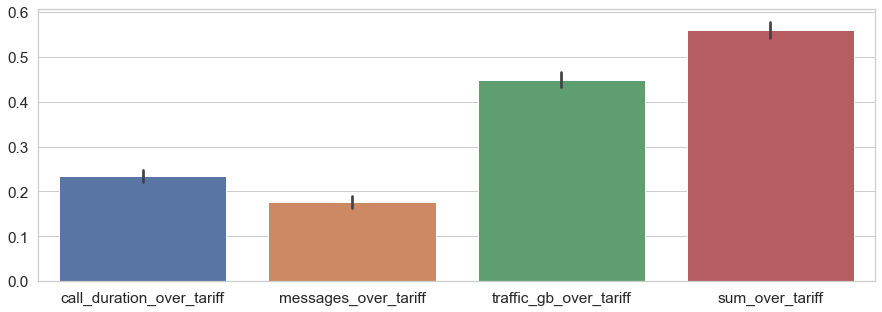

Процент пользователей smart, которые используют услуги сверх пакета 51.8%
Процент пользователей ultra, которые используют услуги сверх пакета 4.2%


In [9]:
df_user_info2['sum_over_tariff'] = df_user_info2['сall_duration_over_tariff'] + df_user_info2['messages_over_tariff'] + df_user_info2['traffic_gb_over_tariff'] 

display(df_user_info2[[
    'сall_duration_over_tariff',
    'messages_over_tariff',
    'traffic_gb_over_tariff',
    'sum_over_tariff'
]].replace(0, np.NaN) .count() / len(df_user_info2))

plt.rcParams['figure.figsize']=(15,5)
sns.barplot(data=df_user_info2[[
    'сall_duration_over_tariff',
    'messages_over_tariff',
    'traffic_gb_over_tariff',
    'sum_over_tariff'
]] != 0);
plt.show()

print(f"Процент пользователей smart, которые используют услуги сверх пакета {df_user_info2[df_user_info2['tariff']=='smart']['sum_over_tariff'].replace(0, np.NaN).count() / len(df_user_info2):.1%}")
print(f"Процент пользователей ultra, которые используют услуги сверх пакета {df_user_info2[df_user_info2['tariff']=='ultra']['sum_over_tariff'].replace(0, np.NaN).count() / len(df_user_info2):.1%}")

А так же посчитаем дополнительную стоимость за такие услуги.

сall_duration_extra_cost     278217.0
messages_extra_cost           38784.0
traffic_gb_extra_cost       1462050.0
rub_monthly_fee             3146700.0
dtype: float64

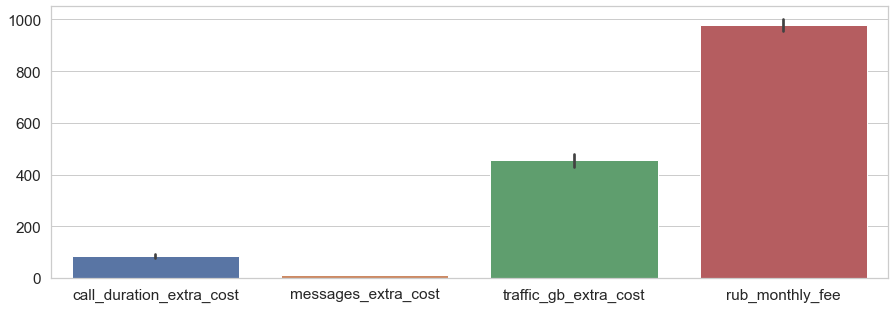

In [10]:
display(df_user_info2[['сall_duration_extra_cost','messages_extra_cost','traffic_gb_extra_cost', 'rub_monthly_fee']].sum())
plt.rcParams['figure.figsize']=(15,5)
sns.barplot(data=df_user_info2[['сall_duration_extra_cost','messages_extra_cost','traffic_gb_extra_cost', 'rub_monthly_fee']]);
plt.show()

### Вывод

Общий цена услуг, за исследуемый год, на 500 пользователей, составила 4.84 млн. рублей. Из данной выборке видно, что больше всего пользователям не хватает пакета трафика в тарифах, они часто выходят за его рамки (44%). Также, этот показатель стоит на втором месте в счетах по расходом у пользователей (1.45 млн. рублей). Первым, с сильным отрывом, цена самого тарифа (3.14 млн. рублей).

Данные собраны в общую таблицу, обработаны и готовы к дальнейшему анализу.

<a id="data_analysis"></a>
## Анализ
<font size="2">([к содержанию](#back_to_content.))</font>

Перед анализом выборок 2 тарифов, сравним их объем. 

In [11]:
df_user_info2['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Напишем функцию отрисовки графика для количества и плотности распределения двух тарифов.

In [12]:
def showСomparisonDistribution(df, groupBy, column, title):
    t = df.pivot_table(index=groupBy, values=column, aggfunc=['mean', 'var', 'std']).round(2)
    t.columns = ['mean', 'var', 'std']
    display(t)
    
    plt.rcParams['figure.figsize']=(20,5)
    fig, ax = plt.subplots(1,2)
        
    sns.histplot(data=df, x=column, hue=groupBy, kde=True, element="step", stat='count', ax=ax[0])
    for group in df[groupBy].unique():
        sns.distplot(df[df[groupBy]==group][column], kde=True, ax=ax[1])
    fig.suptitle(title)
    fig.show() 

,mean,var,std
tariff,,,
smart,419.44,35718.13,188.99
ultra,547.76,93338.43,305.51


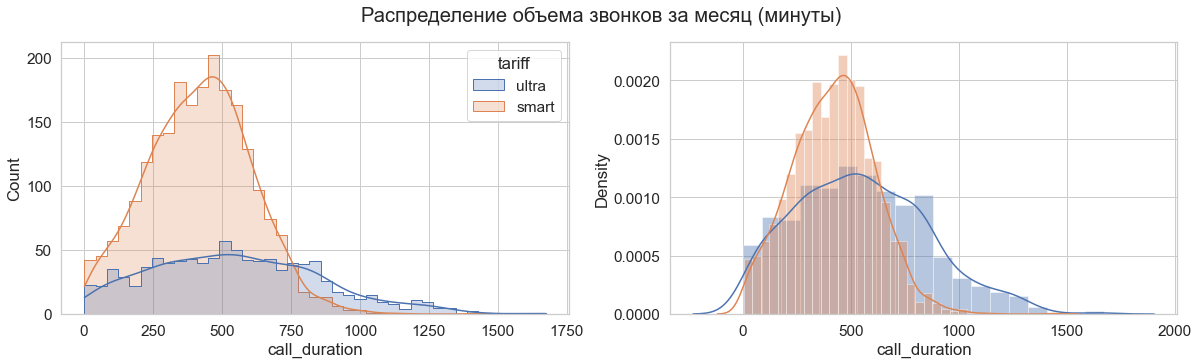

In [13]:
showСomparisonDistribution(df_user_info2, 'tariff', 'сall_duration', 'Распределение объема звонков за месяц (минуты)')

У пользователей тарифа смарт стандартное отклонение меньше, а среднее расположено около 400 минут в месяц. Пользователи ультра периодически разговаривают больше. Среднее находится возле 520 минут в месяц.

,mean,var,std
tariff,,,
smart,38.72,717.59,26.79
ultra,61.16,2109.66,45.93


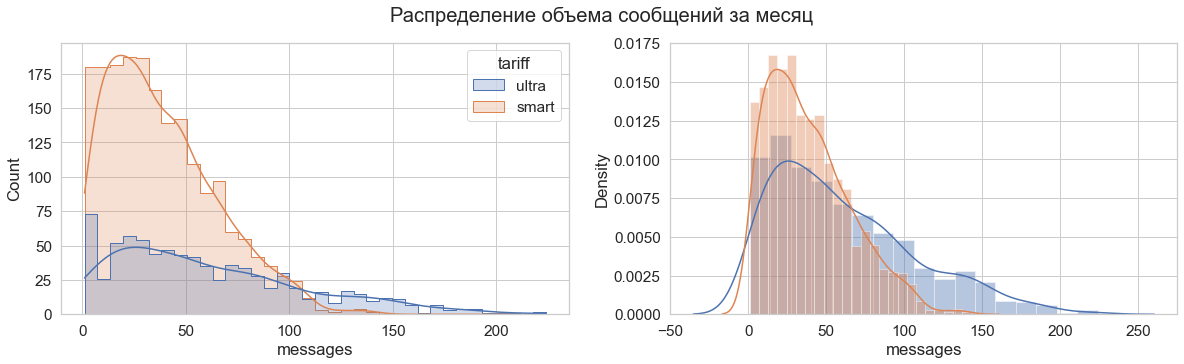

In [14]:
showСomparisonDistribution(df_user_info2, 'tariff', 'messages', 'Распределение объема сообщений за месяц')

Пользователи смарт используют меньше в среднем сообщений в месяц (39 шт), чем пользователи ультра (61 шт)

,mean,var,std
tariff,,,
smart,15.86,32.75,5.72
ultra,19.25,94.17,9.70


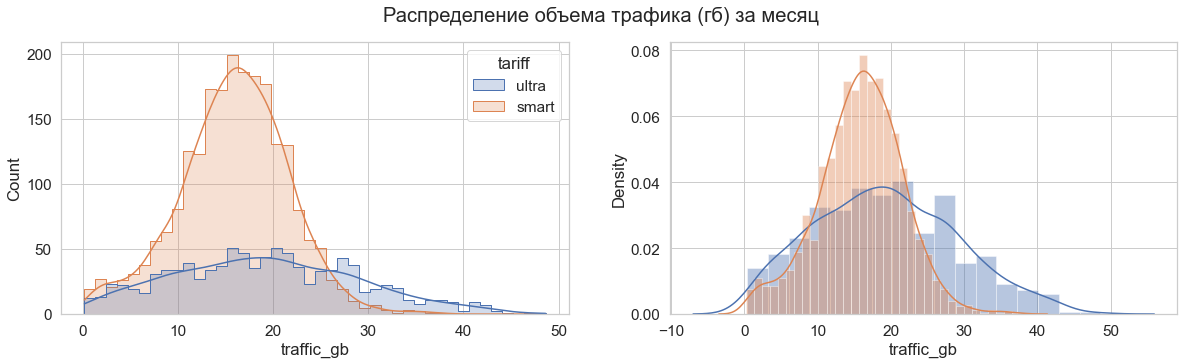

In [15]:
showСomparisonDistribution(df_user_info2, 'tariff', 'traffic_gb', 'Распределение объема трафика (гб) за месяц')

Тоже самое наблюдается и с интернет трафиком. Пользователи ультра часто пользуются большими объемами всех исследуемых услуг.  

<a id="hypothesis_testing"></a>
## Проверка гипотез
<font size="2">([к содержанию](#back_to_content.))</font>

Проверим следующие гипотезы:


    H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
    H1: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов


Сравним общие траты пользователей этих тарифов.

,mean,var,std
tariff,,,
smart,1294.64,673931.32,820.93
ultra,2071.07,143491.24,378.80


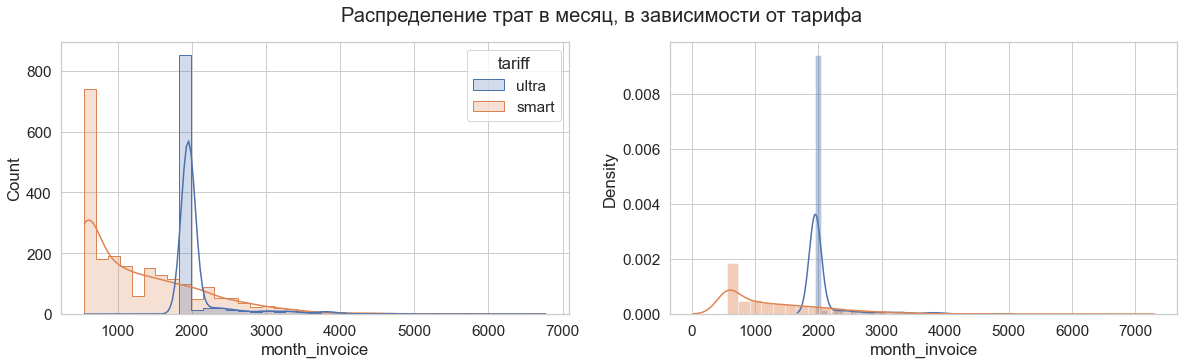

In [16]:
showСomparisonDistribution(df_user_info2, 'tariff', 'month_invoice', 'Распределение трат в месяц, в зависимости от тарифа')

Как уже было проверено ранее большая доля пользователей укладывается в стандартный объем услуг своего тарифа. 2 абонентские плата по этим тарифам являются сами частые платежами, что видно на графике. Визуально можно сказать, что траты у тарифа ультра в среднем больше.

Проверим нулевую гипотезу, что генеральные совокупности данных выборок равны. Для этого исследуем т критерий.

In [17]:
def gaIsEqual(df, maskGroup1, maskGroup2, column, alpha=0.05):

    ttest = st.ttest_ind(
        df[maskGroup1][column],
        df[maskGroup2][column],
        equal_var=False
    )
    
    return [
        ttest.pvalue > alpha,
        ttest.statistic,
        ttest.pvalue
    ]

Критический уровень значимости выбирается согласно объема выборки. Чем меньше выборка, тем больше шанс совершить ошибку первого рода. Стандартными значениями принято считать `0.1`, `0.05`, `0.01`, `0.001`. Для текущего объема уровень значимости стоит выбрать 0.001

In [18]:
gaIsEqual(
    df_user_info2,
    df_user_info2['tariff'] == 'ultra',
    df_user_info2['tariff'] == 'smart',
    'month_invoice',
    0.001
)

[False, 36.68175826499966, 2.724094699353086e-246]

Согласно данному критерию, мы можем опровергнуть нулевую гипотезу.

Проверим гипотезу, что средняя выручка пользователей из Москвы равна выручки из других регионов.

In [19]:
moscowMask = df_user_info2['city'] == 'Москва'

gaIsEqual(
    df_user_info2,
    moscowMask,
    ~moscowMask,
    'month_invoice',
    0.001
)

[True, 0.6549479358773751, 0.5126564657748214]

Судя по p значению, гипотезу не удалось опровергнуть. В этом случае гипотезу H1, что средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов, можно опровергнуть.

In [20]:
df_user_info2.pivot_table(index='tariff', values='month_invoice', aggfunc=sum)

,month_invoice
tariff,
smart,2885751.0
ultra,2040000.0


<a id="conclusion"></a>
## Общий вывод
<font size="2">([к содержанию](#back_to_content.))</font> 

Судя по выборке в 500 пользователей, пакета услуг предоставленный тарифом "Смарт" не хватает. 52% пользователей выходят за рамки хотя бы одной услуги. У пользователей тарифа "Ультра", всего 4% таких случаев. 

Больше всего пользователям не хватает объема интернет трафика, 48% недостаточно стандартного пакета.

Пользователи тарифа "Ультра" в среднем приносят больше денег на одного пользователя 2071.07 р. в месяц, против 1294.64 р. в месяц у пользователя тарифа "Смарт". Но поскольку число пользователей тарифа "Смарт" больше, суммарная прибыль у них выше, 2.8 млн. р. в год, против 2.0 млн. р. в год у пользователей "Ультра" (суммы за 500 пользователей). **Нулевую гипотезу можно опровергнуть**.

Пользователи из Москвы тратят, на услуги связи, в среднем столько же, сколько и пользователи из других городов. **Нет оснований опровергнуть гипотезу H1**.